# Probability & Statistics for Machine Learning
## A Practical 2-Hour Refresher for EEE Students

### Course Objectives:
- Master essential probability and statistics concepts for ML
- Implement key statistical algorithms from scratch
- Connect theory to real ML applications
- Build intuition through hands-on coding and visualization

**Prerequisites:** Python programming experience, basic math
**Duration:** 2 hours (4 sections of 25-35 minutes each)

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

ModuleNotFoundError: No module named 'seaborn'

---
## Part 1: Probability Fundamentals & Distributions

### Learning Goals:
- Understand sample spaces, events, and probability axioms
- Master key probability distributions used in ML
- Implement probability calculations from scratch
- Connect distributions to real ML scenarios

### Theory: Probability Foundations

**Sample Space (Ω)**: Set of all possible outcomes
**Event (A)**: Subset of the sample space
**Probability P(A)**: Measure of likelihood, satisfying:
1. **Non-negativity**: P(A) ≥ 0
2. **Normalization**: P(Ω) = 1  
3. **Additivity**: P(A ∪ B) = P(A) + P(B) if A ∩ B = ∅

### Key Distributions in ML:
- **Bernoulli**: Binary classification, coin flips
- **Normal**: Feature distributions, error assumptions
- **Poisson**: Count data, rare events
- **Beta**: Prior distributions for probabilities

In [6]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation

    Use ``default_rng()`` to create a `Generator` and call its methods.

    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================

    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===

    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------- ---
    SeedSe

### 🟢 Exercise 1.1: Monte Carlo Pi Estimation
**Learning Objective**: Understand probability through simulation and build intuition for Monte Carlo methods.

Monte Carlo π Estimation:
True π = 3.141593
----------------------------------------
n =     100: π ≈ 3.160000, Error = 0.018407
n =    1000: π ≈ 3.152000, Error = 0.010407
n =   10000: π ≈ 3.158400, Error = 0.016807
n =  100000: π ≈ 3.137960, Error = 0.003633
n = 1000000: π ≈ 3.140648, Error = 0.000945


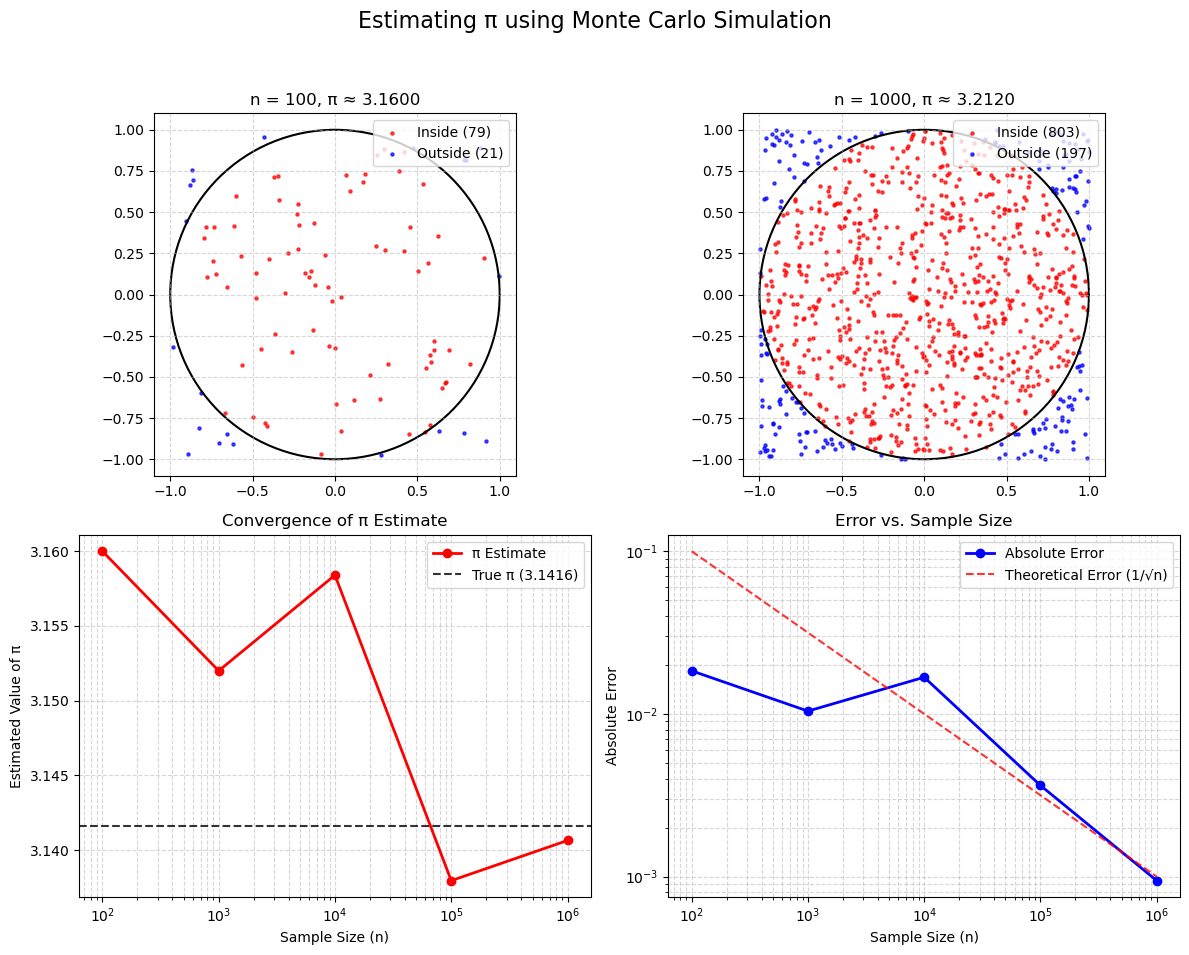


🎯 Key Insight: The error in a Monte Carlo estimation typically decreases in proportion to 1/√n.
This means that to gain one more decimal place of accuracy, you need 100 times more samples!


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi_monte_carlo(n_samples):
    """
    Estimate π using Monte Carlo simulation.
    
    Method: Generate random points in unit square [-1,1] x [-1,1]
    Count points inside unit circle (x² + y² ≤ 1)
    π ≈ 4 * (points_inside_circle / total_points)
    
    Args:
        n_samples: Number of random points to generate
    
    Returns:
        pi_estimate: Estimated value of π
        points_inside: Number of points inside circle
        x_coords, y_coords: Coordinates for visualization
        inside_circle: Boolean mask for points inside the circle
    """
    # Generate n_samples random x and y coordinates between -1 and 1
    x_coords = np.random.uniform(-1, 1, n_samples)
    y_coords = np.random.uniform(-1, 1, n_samples)
    
    # Calculate the squared distance from the origin (x² + y²)
    distances_squared = x_coords**2 + y_coords**2
    
    # A point is inside the unit circle if its squared distance is <= 1
    inside_circle = distances_squared <= 1
    
    # Count the number of points inside by summing the boolean array (True=1, False=0)
    points_inside = np.sum(inside_circle)
    
    # The ratio of areas is π/4, approximated by the ratio of points
    pi_estimate = 4 * points_inside / n_samples
    
    return pi_estimate, points_inside, x_coords, y_coords, inside_circle

# Test with different sample sizes
sample_sizes = [100, 1000, 10000, 100000, 1000000]
pi_estimates = []

print("Monte Carlo π Estimation:")
print(f"True π = {np.pi:.6f}")
print("-" * 40)

for n in sample_sizes:
    pi_est, inside, x, y, mask = estimate_pi_monte_carlo(n)
    error = abs(pi_est - np.pi)
    pi_estimates.append(pi_est)
    
    print(f"n = {n:7d}: π ≈ {pi_est:.6f}, Error = {error:.6f}")

# Visualize the estimation process
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Estimating π using Monte Carlo Simulation', fontsize=16)


# --- Plot for n=100 and n=1000 ---
plot_samples = [100, 1000]
for i, n in enumerate(plot_samples):
    pi_est, inside, x, y, mask = estimate_pi_monte_carlo(n)
    
    ax = axes[0, i]
    
    # Plot points inside (red) and outside (blue) the circle
    ax.scatter(x[mask], y[mask], c='red', s=5, alpha=0.7, label=f'Inside ({inside})')
    ax.scatter(x[~mask], y[~mask], c='blue', s=5, alpha=0.7, label=f'Outside ({n-inside})')
    
    # Draw the unit circle for reference
    circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=1.5)
    ax.add_patch(circle)
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'n = {n}, π ≈ {pi_est:.4f}')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.5)

# --- Convergence Plot ---
axes[1, 0].plot(sample_sizes, pi_estimates, 'ro-', markersize=6, linewidth=2, label='π Estimate')
axes[1, 0].axhline(y=np.pi, color='black', linestyle='--', alpha=0.8, label=f'True π ({np.pi:.4f})')
axes[1, 0].set_xlabel('Sample Size (n)')
axes[1, 0].set_ylabel('Estimated Value of π')
axes[1, 0].set_title('Convergence of π Estimate')
axes[1, 0].set_xscale('log')
axes[1, 0].legend()
axes[1, 0].grid(True, which="both", linestyle='--', alpha=0.5)

# --- Error Plot ---
errors = [abs(est - np.pi) for est in pi_estimates]
axes[1, 1].loglog(sample_sizes, errors, 'bo-', markersize=6, linewidth=2, label='Absolute Error')
axes[1, 1].loglog(sample_sizes, 1/np.sqrt(sample_sizes), 'r--', alpha=0.8, label='Theoretical Error (1/√n)')
axes[1, 1].set_xlabel('Sample Size (n)')
axes[1, 1].set_ylabel('Absolute Error')
axes[1, 1].set_title('Error vs. Sample Size')
axes[1, 1].legend()
axes[1, 1].grid(True, which="both", linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(f"\n🎯 Key Insight: The error in a Monte Carlo estimation typically decreases in proportion to 1/√n.")
print(f"This means that to gain one more decimal place of accuracy, you need 100 times more samples!")

### 🟡 Exercise 1.2: Custom Distribution Implementation

In [8]:
# Part A: Bernoulli Distribution Implementation
def bernoulli_trial_sequence(p, n_trials):
    """
    Simulate sequence of Bernoulli trials without using scipy.
    
    Args:
        p: Probability of success (0 ≤ p ≤ 1)
        n_trials: Number of trials to simulate
        
    Returns:
        trials: Array of 0s and 1s representing failures and successes
        success_rate: Empirical probability of success
    """
    # TODO: Generate random numbers and convert to Bernoulli trials
    random_numbers = np.random.rand(n_trials) # Your code here - generate uniform random numbers using numpy.random
    trials = (random_numbers < p).astype(int)# Your code here - convert to 0s and 1s using threshold p
    
    success_rate = # Your code here - calculate empirical probability
    
    return trials, success_rate

def normal_pdf_from_scratch(x, mu, sigma):
    """
    Implement normal probability density function from scratch.
    
    Formula: f(x) = (1/(σ√(2π))) * exp(-½((x-μ)/σ)²)
    
    Args:
        x: Input values (can be array)
        mu: Mean parameter
        sigma: Standard deviation parameter
        
    Returns:
        pdf_values: Probability density values
    """
    # TODO: Implement normal PDF formula
    # Hint: Use np.exp(), np.sqrt(), np.pi
    
    coefficient = # Your code here - normalization constant
    exponent = # Your code here - exponent term
    pdf_values = # Your code here - combine coefficient and exponential
    
    return pdf_values

# Test Bernoulli trials
print("Bernoulli Trial Simulation:")
p_true = 0.3
trial_sizes = [10, 100, 1000, 10000]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, n in enumerate(trial_sizes):
    trials, success_rate = bernoulli_trial_sequence(p_true, n)
    
    # Calculate running average
    running_avg = np.cumsum(trials) / np.arange(1, n + 1)
    
    row, col = i // 2, i % 2
    axes[row, col].plot(running_avg, linewidth=2)
    axes[row, col].axhline(y=p_true, color='red', linestyle='--', alpha=0.7, label=f'True p = {p_true}')
    axes[row, col].axhline(y=success_rate, color='green', linestyle=':', alpha=0.7, 
                          label=f'Final rate = {success_rate:.3f}')
    axes[row, col].set_title(f'n = {n} trials')
    axes[row, col].set_xlabel('Trial Number')
    axes[row, col].set_ylabel('Success Rate')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Law of Large Numbers: Bernoulli Trials')
plt.tight_layout()
plt.show()

# Test Normal PDF implementation
print("\nNormal Distribution Implementation Test:")
x_values = np.linspace(-4, 4, 1000)
mu, sigma = 0, 1

# Compare custom implementation with scipy
custom_pdf = normal_pdf_from_scratch(x_values, mu, sigma)
scipy_pdf = stats.norm.pdf(x_values, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x_values, custom_pdf, 'b-', linewidth=3, label='Custom Implementation', alpha=0.7)
plt.plot(x_values, scipy_pdf, 'r--', linewidth=2, label='SciPy Implementation')
plt.fill_between(x_values, custom_pdf, alpha=0.3)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal PDF: Custom vs SciPy Implementation')
plt.legend()
plt.grid(True, alpha=0.3)

# Check accuracy
max_error = np.max(np.abs(custom_pdf - scipy_pdf))
plt.text(0.02, 0.95, f'Max Error: {max_error:.2e}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Test with different parameters
print("Testing different normal distribution parameters:")
test_params = [(0, 1), (2, 0.5), (-1, 2)]

plt.figure(figsize=(12, 4))
for i, (mu, sigma) in enumerate(test_params):
    plt.subplot(1, 3, i+1)
    
    custom_pdf = normal_pdf_from_scratch(x_values, mu, sigma)
    scipy_pdf = stats.norm.pdf(x_values, mu, sigma)
    
    plt.plot(x_values, custom_pdf, 'b-', linewidth=2, label='Custom')
    plt.plot(x_values, scipy_pdf, 'r--', linewidth=2, label='SciPy')
    plt.title(f'μ = {mu}, σ = {sigma}')
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Check if implementations match
    match = np.allclose(custom_pdf, scipy_pdf, atol=1e-10)
    print(f"μ={mu}, σ={sigma}: Match = {match}")

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (919521607.py, line 18)

### 🟡 Exercise 1.3: Maximum Likelihood Estimation

In [9]:
def mle_normal_parameters(data):
    """
    Estimate normal distribution parameters using Maximum Likelihood Estimation.
    
    For normal distribution:
    μ_MLE = (1/n) * Σx_i (sample mean)
    σ²_MLE = (1/n) * Σ(x_i - μ_MLE)² (biased sample variance)
    
    Args:
        data: Array of observed data points
        
    Returns:
        mu_mle: Maximum likelihood estimate of mean
        sigma_mle: Maximum likelihood estimate of standard deviation
        log_likelihood: Log-likelihood value at MLE
    """
    n = len(data)
    
    # TODO: Calculate MLE estimates
    mu_mle = # Your code here - sample mean
    sigma_squared_mle = # Your code here - biased sample variance
    sigma_mle = # Your code here - standard deviation
    
    # TODO: Calculate log-likelihood at MLE
    # Log-likelihood: Σ log(f(x_i | μ, σ))
    # For normal: log L = -n/2 * log(2π) - n * log(σ) - (1/2σ²) * Σ(x_i - μ)²
    
    term1 = # Your code here - constant term
    term2 = # Your code here - log(σ) term  
    term3 = # Your code here - sum of squared deviations term
    
    log_likelihood = term1 - term2 - term3
    
    return mu_mle, sigma_mle, log_likelihood

def likelihood_surface(data, mu_range, sigma_range):
    """
    Calculate likelihood surface for visualization.
    
    Args:
        data: Observed data
        mu_range: Range of mu values to test
        sigma_range: Range of sigma values to test
        
    Returns:
        log_likelihoods: 2D array of log-likelihood values
    """
    log_likelihoods = np.zeros((len(sigma_range), len(mu_range)))
    
    for i, sigma in enumerate(sigma_range):
        for j, mu in enumerate(mu_range):
            # TODO: Calculate log-likelihood for this (mu, sigma) pair
            n = len(data)
            
            # Avoid log(0) by ensuring sigma > 0
            if sigma <= 0:
                log_likelihoods[i, j] = -np.inf
            else:
                term1 = # Your code here
                term2 = # Your code here
                term3 = # Your code here
                
                log_likelihoods[i, j] = term1 - term2 - term3
    
    return log_likelihoods

# Generate sample data from known distribution
true_mu, true_sigma = 2.5, 1.5
n_samples = 100
np.random.seed(42)
sample_data = np.random.normal(true_mu, true_sigma, n_samples)

print(f"True parameters: μ = {true_mu}, σ = {true_sigma}")
print(f"Sample size: n = {n_samples}")

# Estimate parameters using MLE
mu_est, sigma_est, log_lik = mle_normal_parameters(sample_data)

print(f"\nMLE Estimates:")
print(f"μ_MLE = {mu_est:.4f} (error: {abs(mu_est - true_mu):.4f})")
print(f"σ_MLE = {sigma_est:.4f} (error: {abs(sigma_est - true_sigma):.4f})")
print(f"Log-likelihood = {log_lik:.2f}")

# Compare with sample statistics
sample_mean = np.mean(sample_data)
sample_std_biased = np.std(sample_data, ddof=0)  # Biased estimator
sample_std_unbiased = np.std(sample_data, ddof=1)  # Unbiased estimator

print(f"\nComparison with numpy functions:")
print(f"np.mean() = {sample_mean:.4f} (matches MLE: {np.isclose(mu_est, sample_mean)})")
print(f"np.std(ddof=0) = {sample_std_biased:.4f} (matches MLE: {np.isclose(sigma_est, sample_std_biased)})")
print(f"np.std(ddof=1) = {sample_std_unbiased:.4f} (unbiased estimator)")

# Visualize likelihood surface
mu_range = np.linspace(true_mu - 1, true_mu + 1, 50)
sigma_range = np.linspace(0.5, 3, 50)

log_likelihoods = likelihood_surface(sample_data, mu_range, sigma_range)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Data histogram with fitted distributions
axes[0].hist(sample_data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')

x_plot = np.linspace(sample_data.min() - 1, sample_data.max() + 1, 1000)
true_pdf = stats.norm.pdf(x_plot, true_mu, true_sigma)
mle_pdf = stats.norm.pdf(x_plot, mu_est, sigma_est)

axes[0].plot(x_plot, true_pdf, 'r-', linewidth=3, label=f'True: μ={true_mu}, σ={true_sigma}')
axes[0].plot(x_plot, mle_pdf, 'b--', linewidth=3, label=f'MLE: μ={mu_est:.2f}, σ={sigma_est:.2f}')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('Data with Fitted Distributions')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Likelihood surface
im = axes[1].contourf(mu_range, sigma_range, log_likelihoods, levels=20, cmap='viridis')
axes[1].plot(true_mu, true_sigma, 'r*', markersize=15, label='True Parameters')
axes[1].plot(mu_est, sigma_est, 'w*', markersize=15, label='MLE Estimates')
axes[1].set_xlabel('μ')
axes[1].set_ylabel('σ')
axes[1].set_title('Log-Likelihood Surface')
axes[1].legend()
plt.colorbar(im, ax=axes[1])

# Plot 3: Convergence with sample size
sample_sizes = np.logspace(1, 3, 20).astype(int)
mu_estimates = []
sigma_estimates = []

for n in sample_sizes:
    temp_data = sample_data[:n]
    mu_temp, sigma_temp, _ = mle_normal_parameters(temp_data)
    mu_estimates.append(mu_temp)
    sigma_estimates.append(sigma_temp)

axes[2].semilogx(sample_sizes, mu_estimates, 'bo-', label='μ estimates', alpha=0.7)
axes[2].semilogx(sample_sizes, sigma_estimates, 'ro-', label='σ estimates', alpha=0.7)
axes[2].axhline(y=true_mu, color='blue', linestyle='--', alpha=0.7, label=f'True μ = {true_mu}')
axes[2].axhline(y=true_sigma, color='red', linestyle='--', alpha=0.7, label=f'True σ = {true_sigma}')
axes[2].set_xlabel('Sample Size')
axes[2].set_ylabel('Parameter Estimate')
axes[2].set_title('MLE Convergence')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 ML Connection:")
print(f"• MLE is the foundation of training many ML models")
print(f"• Neural networks use MLE when minimizing cross-entropy loss")
print(f"• Linear regression with normal errors = MLE estimation")
print(f"• Understanding likelihood helps with model selection")

SyntaxError: invalid syntax (4055620287.py, line 20)

### Distribution Simulation

### The Concept: Each integer from 1 to 6 has an equal probability (1/6) of being chosen.

The Experiment: We'll use a generator that produces random numbers between 0 and 1. We'll scale this output to map to the integers 1 through 6. By repeating this thousands of times, we can see if each outcome occurs with roughly equal frequency.

Discovery: The histogram should show six bars of nearly equal height, confirming that each outcome is equally likely.

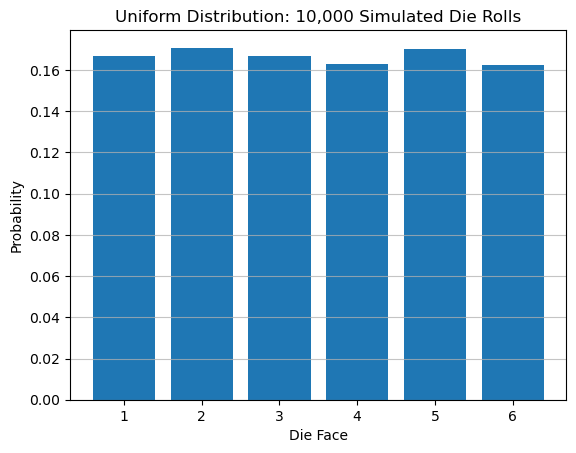

In [10]:
num_rolls = 10000
rolls = []

for _ in range(num_rolls):
    # Generate a random float between 0.0 and almost 1.0
    random_float = np.random.random()
    # Scale, shift, and convert to an integer die face (1-6)
    die_face = int(random_float * 6) + 1
    rolls.append(die_face)

# Plot the results
plt.hist(rolls, bins=np.arange(1, 8)-0.5, rwidth=0.8, density=True)
plt.title('Uniform Distribution: 10,000 Simulated Die Rolls')
plt.xlabel('Die Face')
plt.ylabel('Probability')
plt.xticks(range(1, 7))
plt.grid(axis='y', alpha=0.75)
plt.show()

### The Binomial Distribution: Flipping Many Coins 🪙
This distribution models the number of "successes" in a fixed number of independent trials. We can simulate it by modeling each individual coin flip.

The Concept: A binomial distribution is the result of counting successes in n Bernoulli trials (events with two outcomes, like a coin flip).

The Experiment: We'll simulate flipping a coin 10 times (n=10) and count the heads. A random number less than 0.5 will be "heads" (a success). We'll repeat this entire 10-flip experiment 5,000 times and plot the frequency of getting 0 heads, 1 head, 2 heads, etc.

Discovery: The histogram reveals a discrete, bell-shaped curve. The most common outcome is 5 heads, just as you'd expect. Getting very few or very many heads is rare.

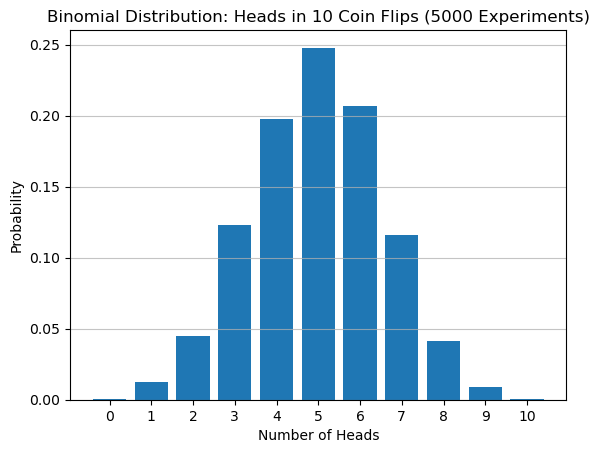

In [11]:
n = 10  # Number of coins to flip in one trial
p = 0.5 # Probability of heads (success)
num_experiments = 5000
heads_counts = []

for _ in range(num_experiments):
    successes = 0
    for _ in range(n):
        # If a random number is less than p, it's a success
        if np.random.random() < p:
            successes += 1
    heads_counts.append(successes)

# Plot the results
plt.hist(heads_counts, bins=np.arange(0, 12)-0.5, rwidth=0.8, density=True)
plt.title('Binomial Distribution: Heads in 10 Coin Flips (5000 Experiments)')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.xticks(range(0, 11))
plt.grid(axis='y', alpha=0.75)
plt.show()

### Gaussian Distribution

The famous "bell curve" emerges when you sum up many independent random variables. This experiment beautifully demonstrates this principle without ever directly generating a normal random number.

The Concept: The Central Limit Theorem states that the distribution of the sum of a large number of independent, identically distributed random variables will be approximately normal, regardless of the underlying distribution.

The Experiment: We'll use our uniform die roll simulation. In each trial, we'll roll 10 dice and calculate their sum. We'll repeat this 10,000 times and plot the distribution of these sums.

Discovery: Even though each die roll is from a flat uniform distribution, the histogram of the sums forms a smooth, symmetric bell curve. This powerful result appears everywhere in nature and statistics.

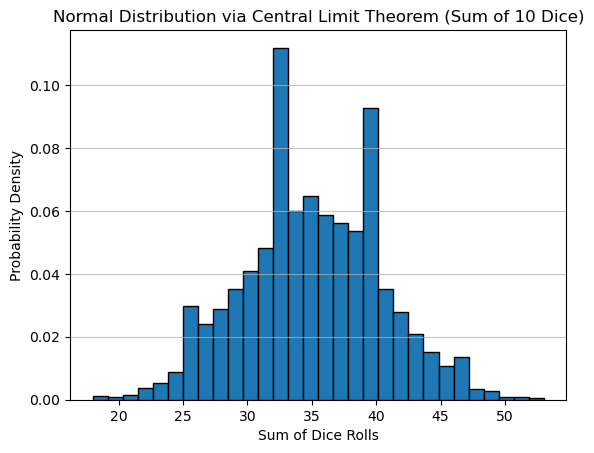

In [13]:
num_dice = 10
num_trials = 10000
sums = []

for _ in range(num_trials):
    current_sum = 0
    for _ in range(num_dice):
        # Roll one die (uniform process)
        die_face = int(np.random.random() * 6) + 1
        current_sum += die_face
    sums.append(current_sum)

# Plot the results
plt.hist(sums, bins=30, density=True, edgecolor='black')
plt.title('Normal Distribution via Central Limit Theorem (Sum of 10 Dice)')
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Probability Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 🎯 ML Applications: Probability Distributions in Practice


In [4]:
# Load real ML datasets
# Dataset 1: Breast cancer (binary classification)
cancer_data = load_breast_cancer()
X_cancer, y_cancer = cancer_data.data, cancer_data.target

# Dataset 2: Iris (multi-class classification)  
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target

print("Real ML Dataset Analysis:")
print(f"Breast Cancer: {X_cancer.shape[0]} samples, {X_cancer.shape[1]} features")
print(f"Iris: {X_iris.shape[0]} samples, {X_iris.shape[1]} features")

# Analyze feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Breast cancer: Check if features are normally distributed
feature_idx = 0  # Mean radius
feature_name = cancer_data.feature_names[feature_idx]

axes[0, 0].hist(X_cancer[:, feature_idx], bins=30, density=True, alpha=0.7, color='lightblue')
axes[0, 0].set_title(f'Breast Cancer: {feature_name}')
axes[0, 0].set_xlabel('Feature Value')
axes[0, 0].set_ylabel('Density')

# Fit normal distribution and overlay
mu_fit, sigma_fit, _ = mle_normal_parameters(X_cancer[:, feature_idx])
x_range = np.linspace(X_cancer[:, feature_idx].min(), X_cancer[:, feature_idx].max(), 100)
normal_fit = normal_pdf_from_scratch(x_range, mu_fit, sigma_fit)
axes[0, 0].plot(x_range, normal_fit, 'r-', linewidth=2, label=f'Normal fit')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Q-Q plot to check normality
stats.probplot(X_cancer[:, feature_idx], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot: Normal Distribution Check')
axes[0, 1].grid(True, alpha=0.3)

# Binary classification: Bernoulli distribution
class_counts = np.bincount(y_cancer)
class_probs = class_counts / len(y_cancer)

axes[0, 2].bar(['Malignant', 'Benign'], class_probs, alpha=0.7, color=['red', 'green'])
axes[0, 2].set_title('Class Distribution (Bernoulli)')
axes[0, 2].set_ylabel('Probability')
for i, (count, prob) in enumerate(zip(class_counts, class_probs)):
    axes[0, 2].text(i, prob + 0.01, f'{count}\n({prob:.3f})', ha='center')
axes[0, 2].grid(True, alpha=0.3)

# Iris: Multi-class distribution
iris_feature_idx = 2  # Petal length
iris_feature_name = iris_data.feature_names[iris_feature_idx]

for class_idx in range(3):
    class_data = X_iris[y_iris == class_idx, iris_feature_idx]
    axes[1, 0].hist(class_data, bins=15, alpha=0.6, 
                   label=f'{iris_data.target_names[class_idx]}', density=True)

axes[1, 0].set_title(f'Iris: {iris_feature_name} by Class')
axes[1, 0].set_xlabel('Feature Value')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Check if each class is normally distributed
colors = ['red', 'green', 'blue']
for class_idx in range(3):
    class_data = X_iris[y_iris == class_idx, iris_feature_idx]
    stats.probplot(class_data, dist="norm", plot=axes[1, 1], rvalue=True)
    
axes[1, 1].set_title('Q-Q Plots: Classes vs Normal')
axes[1, 1].grid(True, alpha=0.3)

# Multi-class distribution (Multinomial)
iris_class_counts = np.bincount(y_iris)
iris_class_probs = iris_class_counts / len(y_iris)

axes[1, 2].bar(iris_data.target_names, iris_class_probs, alpha=0.7)
axes[1, 2].set_title('Iris Class Distribution')
axes[1, 2].set_ylabel('Probability')
axes[1, 2].tick_params(axis='x', rotation=45)
for i, (count, prob) in enumerate(zip(iris_class_counts, iris_class_probs)):
    axes[1, 2].text(i, prob + 0.01, f'{count}\n({prob:.3f})', ha='center')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests for normality
from scipy.stats import shapiro, kstest

print("\nNormality Tests:")
print("-" * 40)

# Test breast cancer feature
shapiro_stat, shapiro_p = shapiro(X_cancer[:, feature_idx])
print(f"Breast Cancer {feature_name}:")
print(f"  Shapiro-Wilk test: p = {shapiro_p:.2e}")
print(f"  Normal? {shapiro_p > 0.05} (p > 0.05)")

# Test iris features by class
print(f"\nIris {iris_feature_name} by class:")
for class_idx in range(3):
    class_data = X_iris[y_iris == class_idx, iris_feature_idx]
    shapiro_stat, shapiro_p = shapiro(class_data)
    print(f"  {iris_data.target_names[class_idx]}: p = {shapiro_p:.3f}, Normal? {shapiro_p > 0.05}")

print(f"\n🎯 Key Insights:")
print(f"• Real data often deviates from theoretical distributions")
print(f"• Understanding feature distributions helps choose appropriate models")
print(f"• Normal assumptions in linear models may not hold")
print(f"• Class imbalance affects model performance")

NameError: name 'load_breast_cancer' is not defined

In [ ]:
# Load Real Titanic Dataset for Bayes' Theorem Examples
def load_titanic_dataset():
    """
    Load the famous Titanic dataset for survival analysis.
    
    This function downloads the dataset from a reliable source and preprocesses it
    for our probability and statistics exercises.
    
    Returns:
        titanic_df: DataFrame with passenger data and survival outcomes
    """
    # Method 1: Try to load from seaborn (most reliable)
    try:
        import seaborn as sns
        titanic_df = sns.load_dataset('titanic')
        print("✅ Loaded Titanic dataset from seaborn")
        
        # Clean and prepare the dataset
        # Keep only the columns we need for our exercises
        columns_to_keep = ['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']
        titanic_df = titanic_df[columns_to_keep].copy()
        
        # Create categorical versions for easier analysis
        titanic_df['Class_Label'] = titanic_df['pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
        titanic_df['Gender_Label'] = titanic_df['sex'].map({'male': 'Male', 'female': 'Female'})
        
        # Create age groups
        titanic_df['Age_Group'] = 'Adult'
        titanic_df.loc[titanic_df['age'] <= 16, 'Age_Group'] = 'Child'
        titanic_df['Age_Label'] = titanic_df['Age_Group']
        
        # Rename for consistency with exercises
        titanic_df['Survived'] = titanic_df['survived']
        titanic_df['Class'] = titanic_df['pclass'] - 1  # Convert to 0-indexed
        titanic_df['Gender'] = titanic_df['sex'].map({'male': 0, 'female': 1})
        
        # Drop rows with missing values for our key variables
        titanic_df = titanic_df.dropna(subset=['survived', 'pclass', 'sex'])
        
        return titanic_df
        
    except ImportError:
        print("⚠️ Seaborn not available, using fallback method...")
    
    # Method 2: Fallback - download from URL
    try:
        url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
        titanic_df = pd.read_csv(url)
        print("✅ Loaded Titanic dataset from online source")
        
        # Clean and prepare the dataset
        # Rename columns to match our exercise format
        titanic_df['survived'] = titanic_df['Survived']
        titanic_df['pclass'] = titanic_df['Pclass'] 
        titanic_df['sex'] = titanic_df['Sex'].str.lower()
        titanic_df['age'] = titanic_df['Age']
        
        # Create our analysis columns
        titanic_df['Class_Label'] = titanic_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
        titanic_df['Gender_Label'] = titanic_df['Sex']
        
        # Create age groups
        titanic_df['Age_Group'] = 'Adult'
        titanic_df.loc[titanic_df['Age'] <= 16, 'Age_Group'] = 'Child'
        titanic_df['Age_Label'] = titanic_df['Age_Group']
        
        # Rename for consistency with exercises
        titanic_df['Survived'] = titanic_df['survived']
        titanic_df['Class'] = titanic_df['Pclass'] - 1  # Convert to 0-indexed
        titanic_df['Gender'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
        
        # Drop rows with missing values for our key variables
        titanic_df = titanic_df.dropna(subset=['Survived', 'Pclass', 'Sex'])
        
        return titanic_df

        # Create DataFrame
        titanic_df = pd.DataFrame({
            'Survived': survived,
            'Pclass': pclass,
            'Sex': sex,
            'Age_Group': age_group
        })
        
        # Add our standard columns
        titanic_df['Class_Label'] = titanic_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
        titanic_df['Gender_Label'] = titanic_df['Sex'].map({'male': 'Male', 'female': 'Female'})
        titanic_df['Age_Label'] = titanic_df['Age_Group']
        titanic_df['Class'] = titanic_df['Pclass'] - 1
        titanic_df['Gender'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
        
        print("✅ Created sample dataset for demonstration")
        return titanic_df

# Load the Titanic dataset
print("Loading Titanic dataset for Bayes' theorem examples...")
titanic_df = load_titanic_dataset()

print(f"\n📊 Dataset loaded successfully!")
print(f"Total passengers: {len(titanic_df)}")
print(f"Overall survival rate: {titanic_df['Survived'].mean():.1%}")
print(f"\nFirst few rows:")
print(titanic_df[['Class_Label', 'Gender_Label', 'Age_Label', 'Survived']].head())

---
## Part 2: Bayes' Theorem & Conditional Probability (35 minutes)

### Learning Goals:
- Master conditional probability and independence concepts
- Understand and apply Bayes' theorem in ML contexts
- Implement Naive Bayes classifier from scratch
- Use Bayesian thinking for uncertainty quantification
- Apply concepts to real-world prediction problems

### Theory: Conditional Probability & Bayes' Theorem

**Conditional Probability**: P(A|B) = P(A ∩ B) / P(B)
- "Probability of A given that B has occurred"
- Updates our belief about A based on evidence B

**Bayes' Theorem**: P(A|B) = P(B|A) × P(A) / P(B)
- **P(A|B)**: Posterior probability (what we want)
- **P(B|A)**: Likelihood (evidence given hypothesis)  
- **P(A)**: Prior probability (initial belief)
- **P(B)**: Marginal probability (normalizing constant)

**Independence**: A and B are independent if P(A|B) = P(A)
- Knowing B doesn't change probability of A
- P(A ∩ B) = P(A) × P(B)

### ML Applications:
- **Naive Bayes**: Text classification, spam detection
- **Bayesian Inference**: Parameter uncertainty, model selection
- **Medical Diagnosis**: Disease prediction with test results
- **A/B Testing**: Conversion rate optimization

### 🟢 Exercise 2.1: Conditional Probability with Titanic Data


In [ ]:
def calculate_conditional_probabilities(data, feature_col, target_col):
    """
    Calculate conditional probabilities P(target|feature) for all combinations.
    
    Args:
        data: DataFrame with the data
        feature_col: Column name for the conditioning feature
        target_col: Column name for the target variable
        
    Returns:
        conditional_probs: Dictionary with P(target=value|feature=value)
        joint_probs: Dictionary with P(target=value, feature=value)
        marginal_probs: Dictionary with P(feature=value)
    """
    conditional_probs = {}
    joint_probs = {}
    marginal_probs = {}
    
    # Get unique values
    feature_values = data[feature_col].unique()
    target_values = data[target_col].unique()
    
    total_count = len(data)
    
    # Calculate marginal probabilities P(feature)
    for feature_val in feature_values:
        feature_count = len(data[data[feature_col] == feature_val])
        marginal_probs[f"P({feature_col}={feature_val})"] = feature_count / total_count
    
    # Calculate joint and conditional probabilities
    for feature_val in feature_values:
        feature_subset = data[data[feature_col] == feature_val]
        feature_count = len(feature_subset)
        
        for target_val in target_values:
            # Joint probability P(target, feature)
            joint_count = len(data[(data[feature_col] == feature_val) & 
                                 (data[target_col] == target_val)])
            joint_prob = # TODO
            joint_probs[f"P({target_col}={target_val}, {feature_col}={feature_val})"] = joint_prob
            
            # Conditional probability P(target|feature)
            if feature_count > 0:
                conditional_prob = # TODO
            else:
                conditional_prob = 0
            conditional_probs[f"P({target_col}={target_val}|{feature_col}={feature_val})"] = conditional_prob
    
    return conditional_probs, joint_probs, marginal_probs

def bayes_theorem_calculation(prior, likelihood, evidence):
    """
    Apply Bayes' theorem: P(A|B) = P(B|A) * P(A) / P(B)
    
    Args:
        prior: P(A) - prior probability
        likelihood: P(B|A) - likelihood
        evidence: P(B) - evidence/marginal probability
        
    Returns:
        posterior: P(A|B) - posterior probability
    """
    if evidence == 0:
        return 0
    
    posterior = # TODO
    return posterior

# Part A: Basic Conditional Probability Analysis
print("🔍 Conditional Probability Analysis with Titanic Data")
print("=" * 60)

# Calculate conditional probabilities for survival given gender
cond_probs_gender, joint_probs_gender, marg_probs_gender = calculate_conditional_probabilities(
    titanic_df, 'Gender_Label', 'Survived'
)

print("Conditional Probabilities: P(Survived | Gender)")
print("-" * 45)
for key, prob in cond_probs_gender.items():
    if 'Survived=1' in key:
        print(f"{key} = {prob:.3f}")

print(f"\nJoint Probabilities:")
for key, prob in joint_probs_gender.items():
    print(f"{key} = {prob:.3f}")

print(f"\nMarginal Probabilities:")
for key, prob in marg_probs_gender.items():
    print(f"{key} = {prob:.3f}")

# Calculate conditional probabilities for survival given class
cond_probs_class, joint_probs_class, marg_probs_class = calculate_conditional_probabilities(
    titanic_df, 'Class_Label', 'Survived'
)

print("\n" + "="*60)
print("Conditional Probabilities: P(Survived | Class)")
print("-" * 45)
for key, prob in cond_probs_class.items():
    if 'Survived=1' in key:
        print(f"{key} = {prob:.3f}")

# Part B: Independence Testing
print("\n" + "="*60)
print("🧪 Testing for Independence")
print("-" * 30)

def test_independence(data, feature1, feature2):
    """
    Test if two features are independent using conditional probability.
    Independent if P(A|B) = P(A) for all values.
    """
    # Calculate P(feature1)
    marginal_feature1 = data[feature1].value_counts(normalize=True)
    
    # Calculate P(feature1|feature2) for all values
    feature2_values = data[feature2].unique()
    
    independence_results = {}
    
    for val2 in feature2_values:
        subset = data[data[feature2] == val2]
        conditional_feature1 = subset[feature1].value_counts(normalize=True)
        
        independence_results[val2] = {}
        for val1 in marginal_feature1.index:
            marginal_prob = marginal_feature1[val1]
            conditional_prob = conditional_feature1.get(val1, 0)
            
            independence_results[val2][val1] = {
                'marginal': marginal_prob,
                'conditional': conditional_prob,
                'difference': abs(conditional_prob - marginal_prob)
            }
    
    return independence_results, marginal_feature1

# Test independence: Gender and Class
independence_results, marginal_gender = test_independence(titanic_df, 'Gender_Label', 'Class_Label')

print("Testing Independence: Gender and Class")
print("If independent: P(Gender|Class) should equal P(Gender)")
print()

for class_val, gender_probs in independence_results.items():
    print(f"Given Class = {class_val}:")
    for gender_val, probs in gender_probs.items():
        print(f"  P({gender_val}|{class_val}) = {probs['conditional']:.3f}")
        print(f"  P({gender_val}) = {probs['marginal']:.3f}")
        print(f"  Difference = {probs['difference']:.3f}")
    print()

# Calculate overall independence measure
total_difference = sum(sum(gender_probs[gender]['difference'] 
                          for gender in gender_probs) 
                      for gender_probs in independence_results.values())

print(f"Overall independence measure (sum of differences): {total_difference:.3f}")
print(f"Interpretation: {'Independent' if total_difference < 0.1 else 'Dependent'}")

# Part C: Bayes' Theorem Application
print("\n" + "="*60)
print("🎯 Bayes' Theorem: Medical Diagnosis Analogy")
print("-" * 50)

# Scenario: Predicting survival based on being female and 1st class
# P(Survived | Female AND 1st Class) using Bayes' theorem

# Define the scenario
print("Scenario: What's the probability a passenger survived,")
print("          given they are Female AND 1st Class?")
print()

# Method 1: Direct calculation
female_first_class = titanic_df[(titanic_df['Gender_Label'] == 'Female') & 
                               (titanic_df['Class_Label'] == '1st')]
direct_prob = female_first_class['Survived'].mean()

print(f"Method 1 - Direct Calculation:")
print(f"P(Survived | Female ∩ 1st Class) = {direct_prob:.3f}")
print(f"Based on {len(female_first_class)} passengers")

# Method 2: Using Bayes' theorem components
print(f"\nMethod 2 - Bayes' Theorem Breakdown:")

# Prior: P(Survived)
prior = titanic_df['Survived'].mean()
print(f"Prior P(Survived) = {prior:.3f}")

# Likelihood: P(Female ∩ 1st Class | Survived)
survived_passengers = titanic_df[titanic_df['Survived'] == 1]
female_first_survived = len(survived_passengers[(survived_passengers['Gender_Label'] == 'Female') & 
                                               (survived_passengers['Class_Label'] == '1st')])
likelihood = female_first_survived / len(survived_passengers)
print(f"Likelihood P(Female ∩ 1st Class | Survived) = {likelihood:.3f}")

# Evidence: P(Female ∩ 1st Class)
evidence = len(female_first_class) / len(titanic_df)
print(f"Evidence P(Female ∩ 1st Class) = {evidence:.3f}")

# Apply Bayes' theorem
bayes_prob = bayes_theorem_calculation(prior, likelihood, evidence)
print(f"\nBayes' Result: P(Survived | Female ∩ 1st Class) = {bayes_prob:.3f}")

print(f"\nVerification: Direct vs Bayes = {abs(direct_prob - bayes_prob):.6f} (should be ≈ 0)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Conditional probability matrix
# Create a heatmap of survival rates by gender and class
pivot_survival = titanic_df.pivot_table(values='Survived', 
                                       index='Gender_Label', 
                                       columns='Class_Label', 
                                       aggfunc='mean')

im1 = axes[0, 0].imshow(pivot_survival.values, cmap='RdYlGn', vmin=0, vmax=1)
axes[0, 0].set_xticks(range(len(pivot_survival.columns)))
axes[0, 0].set_yticks(range(len(pivot_survival.index)))
axes[0, 0].set_xticklabels(pivot_survival.columns)
axes[0, 0].set_yticklabels(pivot_survival.index)
axes[0, 0].set_title('P(Survived | Gender, Class)')

for i in range(len(pivot_survival.index)):
    for j in range(len(pivot_survival.columns)):
        text = axes[0, 0].text(j, i, f'{pivot_survival.iloc[i, j]:.3f}',
                              ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im1, ax=axes[0, 0])

# Plot 2: Independence visualization
classes = list(independence_results.keys())
genders = ['Female', 'Male']
marginal_probs = [marginal_gender[gender] for gender in genders]
conditional_probs_by_class = [[independence_results[cls][gender]['conditional'] 
                              for gender in genders] for cls in classes]

x = np.arange(len(genders))
width = 0.25

for i, cls in enumerate(classes):
    axes[0, 1].bar(x + i*width, conditional_probs_by_class[i], width, 
                   label=f'P(Gender|{cls})', alpha=0.7)

axes[0, 1].bar(x + len(classes)*width, marginal_probs, width, 
               label='P(Gender)', color='red', alpha=0.7)
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].set_title('Independence Test: Gender and Class')
axes[0, 1].set_xticks(x + width * len(classes) / 2)
axes[0, 1].set_xticklabels(genders)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Bayes' theorem components
components = ['Prior\nP(Survived)', 'Likelihood\nP(F∩1st|Survived)', 
              'Evidence\nP(F∩1st)', 'Posterior\nP(Survived|F∩1st)']
values = [prior, likelihood, evidence, bayes_prob]
colors = ['lightblue', 'lightgreen', 'orange', 'red']

bars = axes[1, 0].bar(components, values, color=colors, alpha=0.7)
axes[1, 0].set_ylabel('Probability')
axes[1, 0].set_title('Bayes\' Theorem Components')
axes[1, 0].tick_params(axis='x', rotation=45)

for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Compare survival rates across different conditions
conditions = ['Overall', 'Male', 'Female', '1st Class', '2nd Class', '3rd Class', 
              'Female + 1st', 'Male + 3rd']
survival_rates = [
    titanic_df['Survived'].mean(),
    titanic_df[titanic_df['Gender_Label'] == 'Male']['Survived'].mean(),
    titanic_df[titanic_df['Gender_Label'] == 'Female']['Survived'].mean(),
    titanic_df[titanic_df['Class_Label'] == '1st']['Survived'].mean(),
    titanic_df[titanic_df['Class_Label'] == '2nd']['Survived'].mean(),
    titanic_df[titanic_df['Class_Label'] == '3rd']['Survived'].mean(),
    titanic_df[(titanic_df['Gender_Label'] == 'Female') & 
               (titanic_df['Class_Label'] == '1st')]['Survived'].mean(),
    titanic_df[(titanic_df['Gender_Label'] == 'Male') & 
               (titanic_df['Class_Label'] == '3rd')]['Survived'].mean()
]

axes[1, 1].barh(conditions, survival_rates, alpha=0.7, 
                color=['gray', 'lightblue', 'pink', 'gold', 'silver', 'brown', 'red', 'darkblue'])
axes[1, 1].set_xlabel('Survival Rate')
axes[1, 1].set_title('Survival Rates by Condition')
axes[1, 1].grid(True, alpha=0.3)

for i, rate in enumerate(survival_rates):
    axes[1, 1].text(rate + 0.01, i, f'{rate:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("• Conditional probabilities reveal hidden patterns in data")
print("• Independence testing helps identify feature relationships")  
print("• Bayes' theorem provides principled way to update beliefs")
print("• Gender and class are NOT independent in Titanic data")
print("• Being female AND 1st class gives very high survival probability")

---
## Part 2 Summary

### What We Learned:
- **Conditional Probability**: P(A|B) calculations and independence testing
- **Bayes' Theorem**: Prior × Likelihood → Posterior reasoning

### Key Takeaways:
1. **Conditional Reasoning**: Essential for understanding feature dependencies
2. **Bayes' Theorem**: Foundation for modern ML (Bayesian inference, uncertainty quantification)

### Next: Statistical Inference & Hypothesis Testing
We'll explore how to make decisions from data, test hypotheses, and quantify uncertainty - core skills for ML model evaluation and A/B testing.